# Project 1: Disruption problem
# Students: Khair Mohamed - El Firdoussi Aymane

In [84]:
import numpy as np
import matplotlib.pyplot as plt 

# All imports go here

# Question 1:

Using the last question in the exercise 2.5.6, we have that the dynamics of $\hat{Z}$ between two jumps $T_n$ and $T_{n + 1}$, which are also the jumps of the process N, is given by:

$$ \hat{Z}(t) = \hat{Z}(T_n) + \int_{T_n}^t (h(s) - (\lambda_1 - \lambda_0) \hat{Z}(s)) (1 - \hat{Z}(s)) ds $$ 

$$ \hat{Z}(T_n) = \hat{Z}(T_n^-) + \frac{(\lambda_1 - \lambda_0)\hat{Z}(T_n^-)(1 - \hat{Z}(T_n^-))}{\lambda_0 + (\lambda_1 - \lambda_0) \hat{Z}(T_n^-)} $$

# Question 2:

$$ \xi_n = T_{n + 1} - T_n $$

In [9]:
# Generating a Poisson process of intensity lambda
def poisson_process(t, n, lam):
    """
    n: is the total number of jump times to generate
    lam : the intensity of the Poisson process
    
    """
    # generating the inter-arrivals
    xi = np.random.exponential(scale = 1 / lam, size = n)
    
    # computing the jumpt times
    T = np.zeros(n + 1)
    T[1] = xi[0]
    
    for i in range(1, n):
        T[i + 1] = T[i] + xi[i]
        
    # Now that we have the jump times, we compute the value of the Poisson process in t
    N = np.sum(T <= t)
    
    return T, N

In [15]:
T, N = poisson_process(20, 100, 2)
print(N)

47


In [20]:
def point_process(lam0, lam1, tau, n):
    # T is the jump times process
    T = [0]
    xi = np.random.exponential(scale = 1 / lam0)
    t = xi
    while t < tau:
        T.append(t)
        t += np.random.exponential(scale = 1 / lam0)
    
    t = tau
    for i in range(n):
        t += np.random.exponential(scale = 1 / lam1)
        T.append(t)
    
    return T

In [21]:
def poisson(T, t):
    return np.sum(np.array(T) <= t)


### Plotting a sample point process

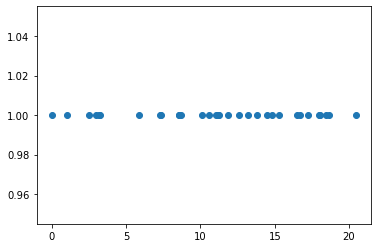

In [27]:
# Parameters
lam0 = 1
lam1 = 2
n = 20
tau = 10

T = point_process(lam0, lam1, tau, n)
# Plotting
plt.scatter(T, np.ones(len(T)))
plt.show()

## Plotting a sample path of the Poisson process N

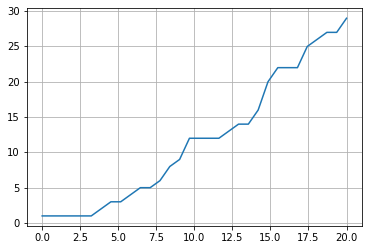

In [29]:
# Parameters
lam0 = 1
lam1 = 2
n = 20
tau = 10

# Plotting
T = point_process(lam0, lam1, tau, n)
t = np.linspace(0, 20, len(T))
N = []
for x in t:
    N.append(poisson(T, x))
plt.plot(t, N)
plt.grid()
plt.show()

## Simulating a sample trajectory of Z

In [92]:
def Z_hat(T, p, lam, lam1, lam0):
    n = len(T)
    Z = np.zeros((n - 1, p))
    U = []
    
    # Initializastion: row 0
    h =(T[1] - T[0]) / p
    u = T[0]
    U.append(u)
    for j in range(p - 1):
        Z[0, j + 1] = Z[0, j] + h * (lam - (lam1 - lam0) * Z[0, j]) * (1 - Z[0, j])
        u += h
        U.append(u)
        
    # parcourir les lignes [T_i, T_{i + 1}[
    for i in range(1, n - 1):
        h =(T[i + 1] - T[i]) / p
        u = T[i]
        U.append(u)
        # computing the initial value with the transition expression (jump size)
        Z[i, 0] = Z[i - 1, p - 1] + ((lam1 - lam0) * Z[i - 1, p - 1] * (1 - Z[i - 1, p - 1])) / (lam0 + (lam1 - lam0) * Z[i - 1, p - 1])
        
        # computing Z[i, j]
        for j in range(p - 1):
            Z[i, j + 1] = Z[i, j] + h * (lam - (lam1 - lam0) * Z[i, j]) * (1 - Z[i, j])
            u += h
            U.append(u)
        
    return Z, U

## Plotting results

In [109]:
# Parameters
p = 50
lam0 = 1
lam1 = 2
lam = 1
tau = np.random.exponential(scale = 1 / lam)

# Simulating T and Z
T = point_process(lam0, lam1, tau, 20)
Z, U = Z_hat(T, p, lam, lam1, lam0)


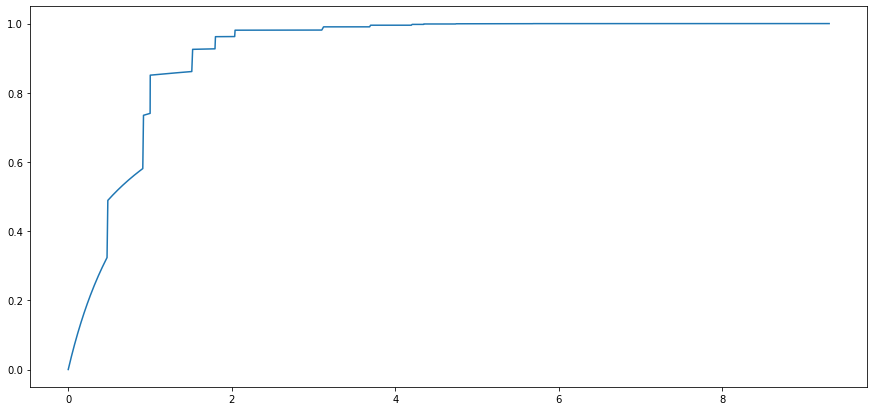

In [110]:
plt.figure(figsize = (15, 7))
Z_flat = Z.reshape(1, -1)[0]
plt.plot(U, Z_flat)
plt.show()

In [111]:
print(tau)

0.2191539015384723
